Aim of this notebook is to look at calibrated stereo images and to visualize some mathematical properties of pairs of matched keypoints, found by opencv sift algorithms or our pysift implementation.


In [75]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from visu_hessian import (
    visualize_curvature_values,
    visualize_curvature_directions,
    visualize_gradients,
)

# load grayscale image


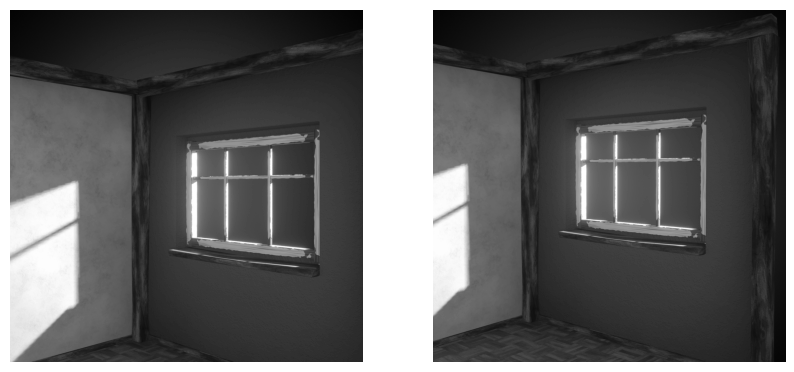

In [76]:
img_folder = "../data"
im_name1 = "cube-0"
im_name2 = "cube-1"
im_ext = "png"
im1 = cv.imread(f"{img_folder}/{im_name1}.{im_ext}", cv.IMREAD_GRAYSCALE)
im2 = cv.imread(f"{img_folder}/{im_name2}.{im_ext}", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im1, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(im2, cmap="gray")
plt.axis("off")
plt.show()

# Match SIFT Keypoints on stereo setup


In [77]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)

# print number of keypoints detected in each image
print(f"Number of keypoints detected in {im_name1}: {len(kp1)}")
print(f"Number of keypoints detected in {im_name2}: {len(kp2)}")

Number of keypoints detected in cube-0: 396
Number of keypoints detected in cube-1: 440


In [78]:
# BFMatcher with default params
# default norm is L2
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
threshold = 0.75
good = []
for m, n in matches:
    if m.distance < threshold * n.distance:
        good.append([m])

# Alternative: crossCheck=True
bf_CC = cv.BFMatcher(crossCheck=True)
matches_CC = bf_CC.match(des1, des2)

# Sort them in the order of their distance.
good_sorted = sorted(good, key=lambda x: x[0].distance)
matches_CC_sorted = sorted(matches_CC, key=lambda x: x.distance)

# print the distances
print("Distances with Lowe's ratio:")
for m in good_sorted[:10]:
    print(f"{m[0].distance:.2f}", end=" ")

print("\nDistances with crossCheck:")
for m in matches_CC_sorted[:10]:
    print(f"{m.distance:.2f}", end=" ")

Distances with Lowe's ratio:
8.94 12.41 13.64 15.23 17.38 17.64 19.03 21.89 22.09 23.30 
Distances with crossCheck:
8.94 12.41 13.64 15.23 17.38 17.64 19.03 21.89 22.09 23.30 

In [79]:
# cv.drawMatchesKnn expects list of lists as matches.
nb_matches_to_draw = 100

img3 = cv.drawMatchesKnn(
    im1,
    kp1,
    im2,
    kp2,
    good_sorted[:nb_matches_to_draw],
    outImg=None,
    singlePointColor=(255, 0, 0),
)
img4 = cv.drawMatches(
    im1,
    kp1,
    im2,
    kp2,
    matches_CC_sorted[:nb_matches_to_draw],
    singlePointColor=(255, 0, 0),
    outImg=None,
)

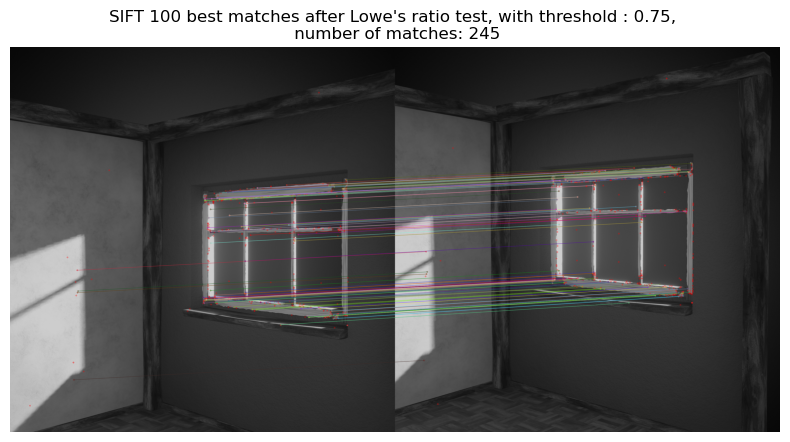

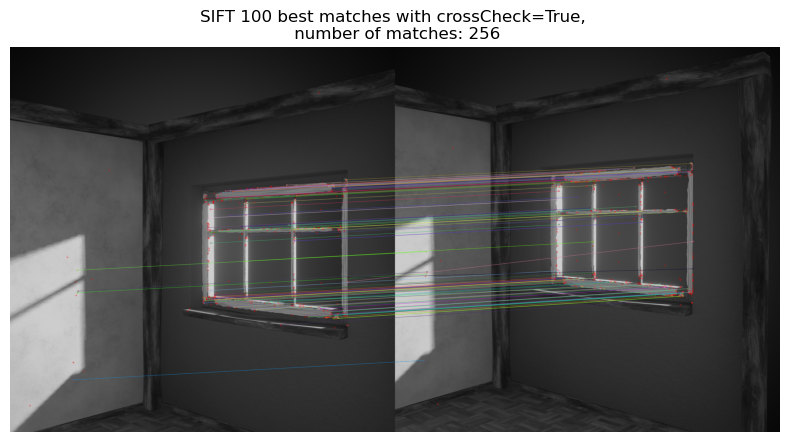

In [80]:
# display matches
plt.figure(figsize=(10, 5))
plt.imshow(img3)
plt.axis("off")
plt.title(
    f"SIFT {nb_matches_to_draw} best matches after Lowe's ratio test, with threshold : {threshold}, \n number of matches: {len(good)}"
)
# save figure
plt.savefig(f"{img_folder}/cubes_sift_matches_{nb_matches_to_draw}_lowe.png", dpi=600)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(img4)
plt.axis("off")
plt.title(
    f"SIFT {nb_matches_to_draw} best matches with crossCheck=True, \n number of matches: {len(matches_CC)}"
)
# save figure
plt.savefig(
    f"{img_folder}/cubes_sift_matches_{nb_matches_to_draw}_crossCheck.png", dpi=600
)
plt.show()

# Visualize gradients and curvatures


In [81]:
# store keypoints of good matches in 2 lists, 1 per image
kp_img1 = []
kp_img2 = []

for m in good_sorted:
    kp_img1.append(kp1[m[0].queryIdx])
    kp_img2.append(kp2[m[0].trainIdx])

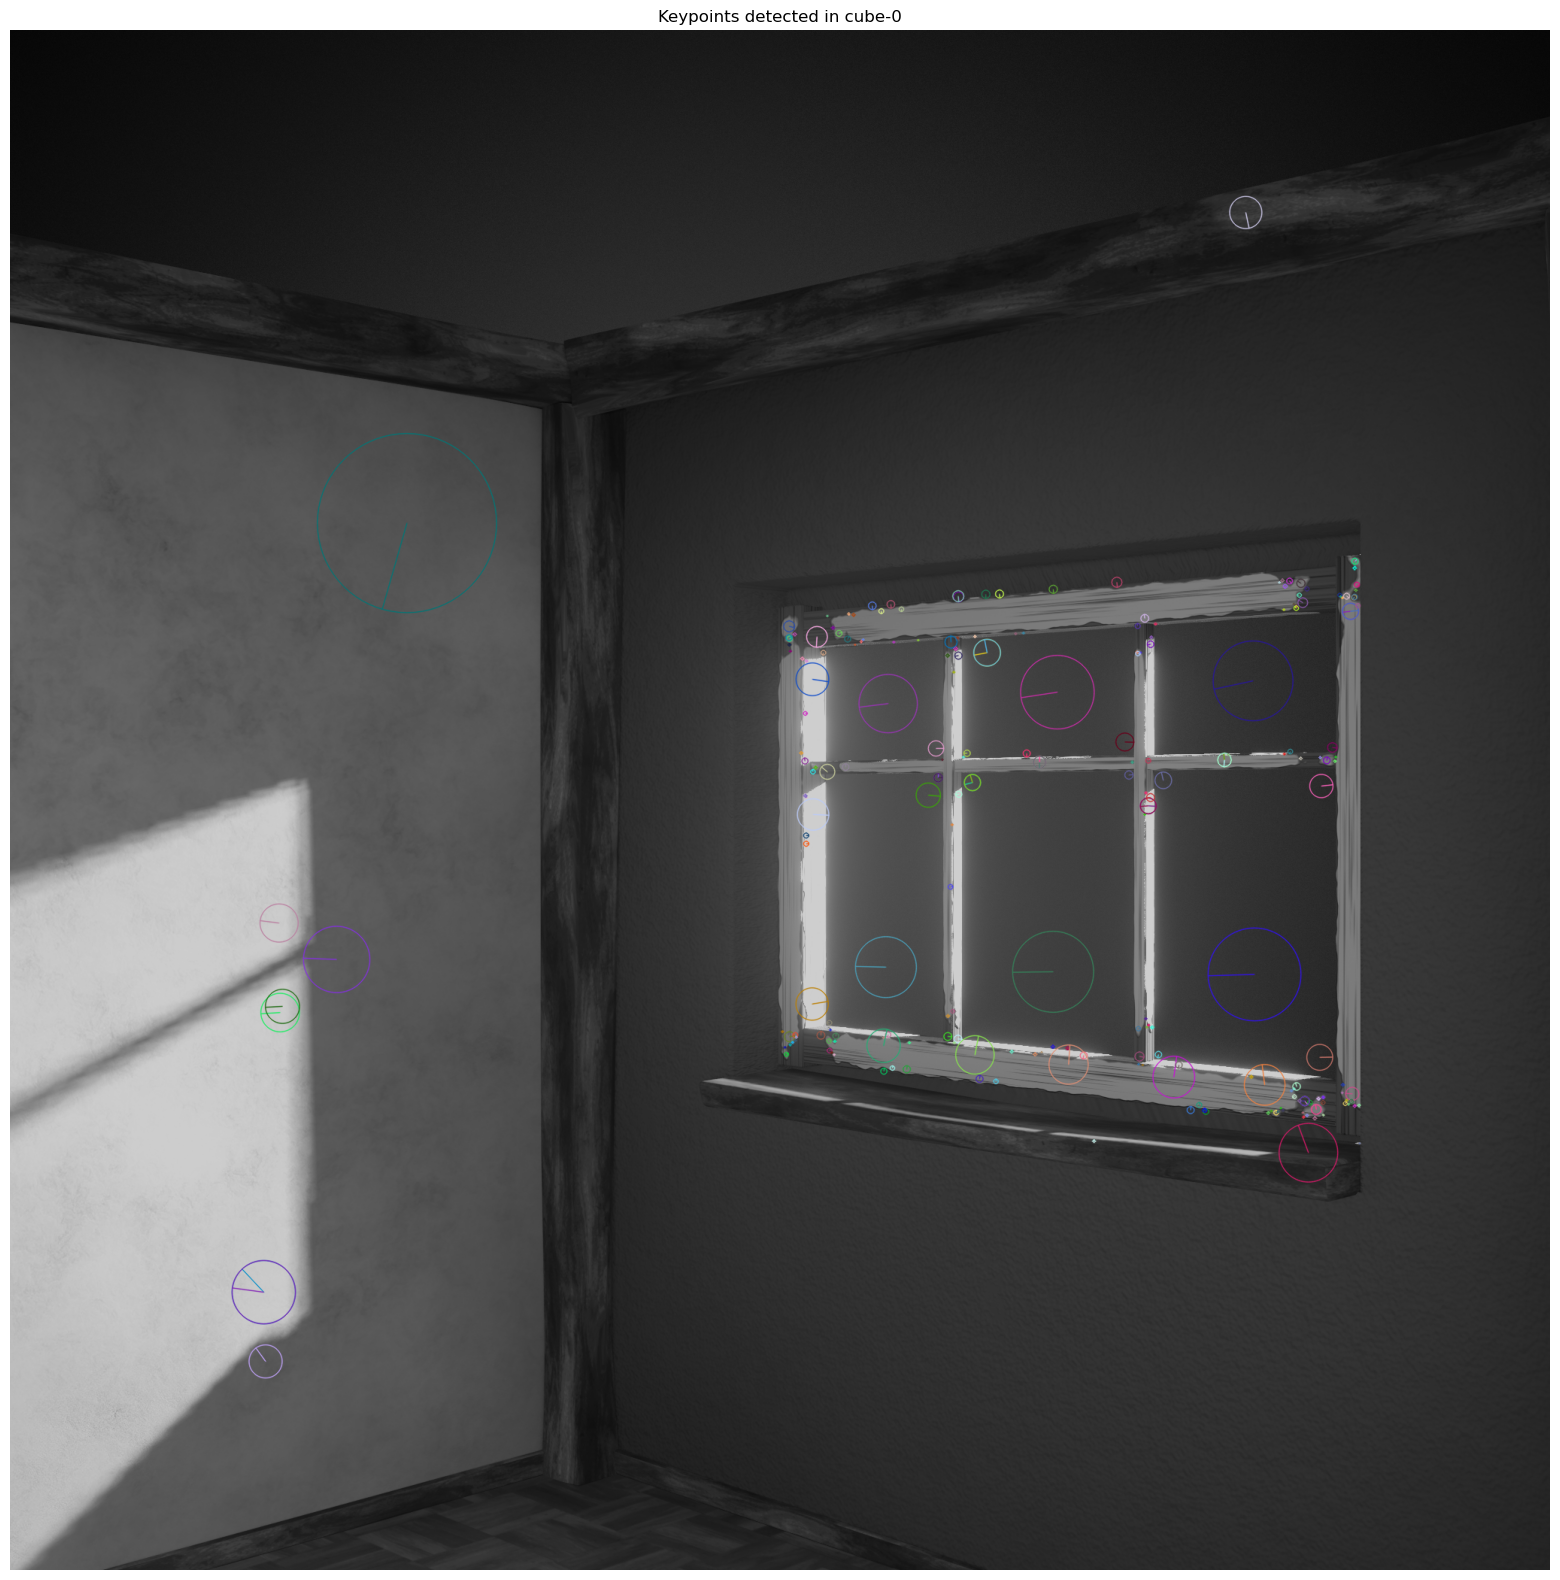

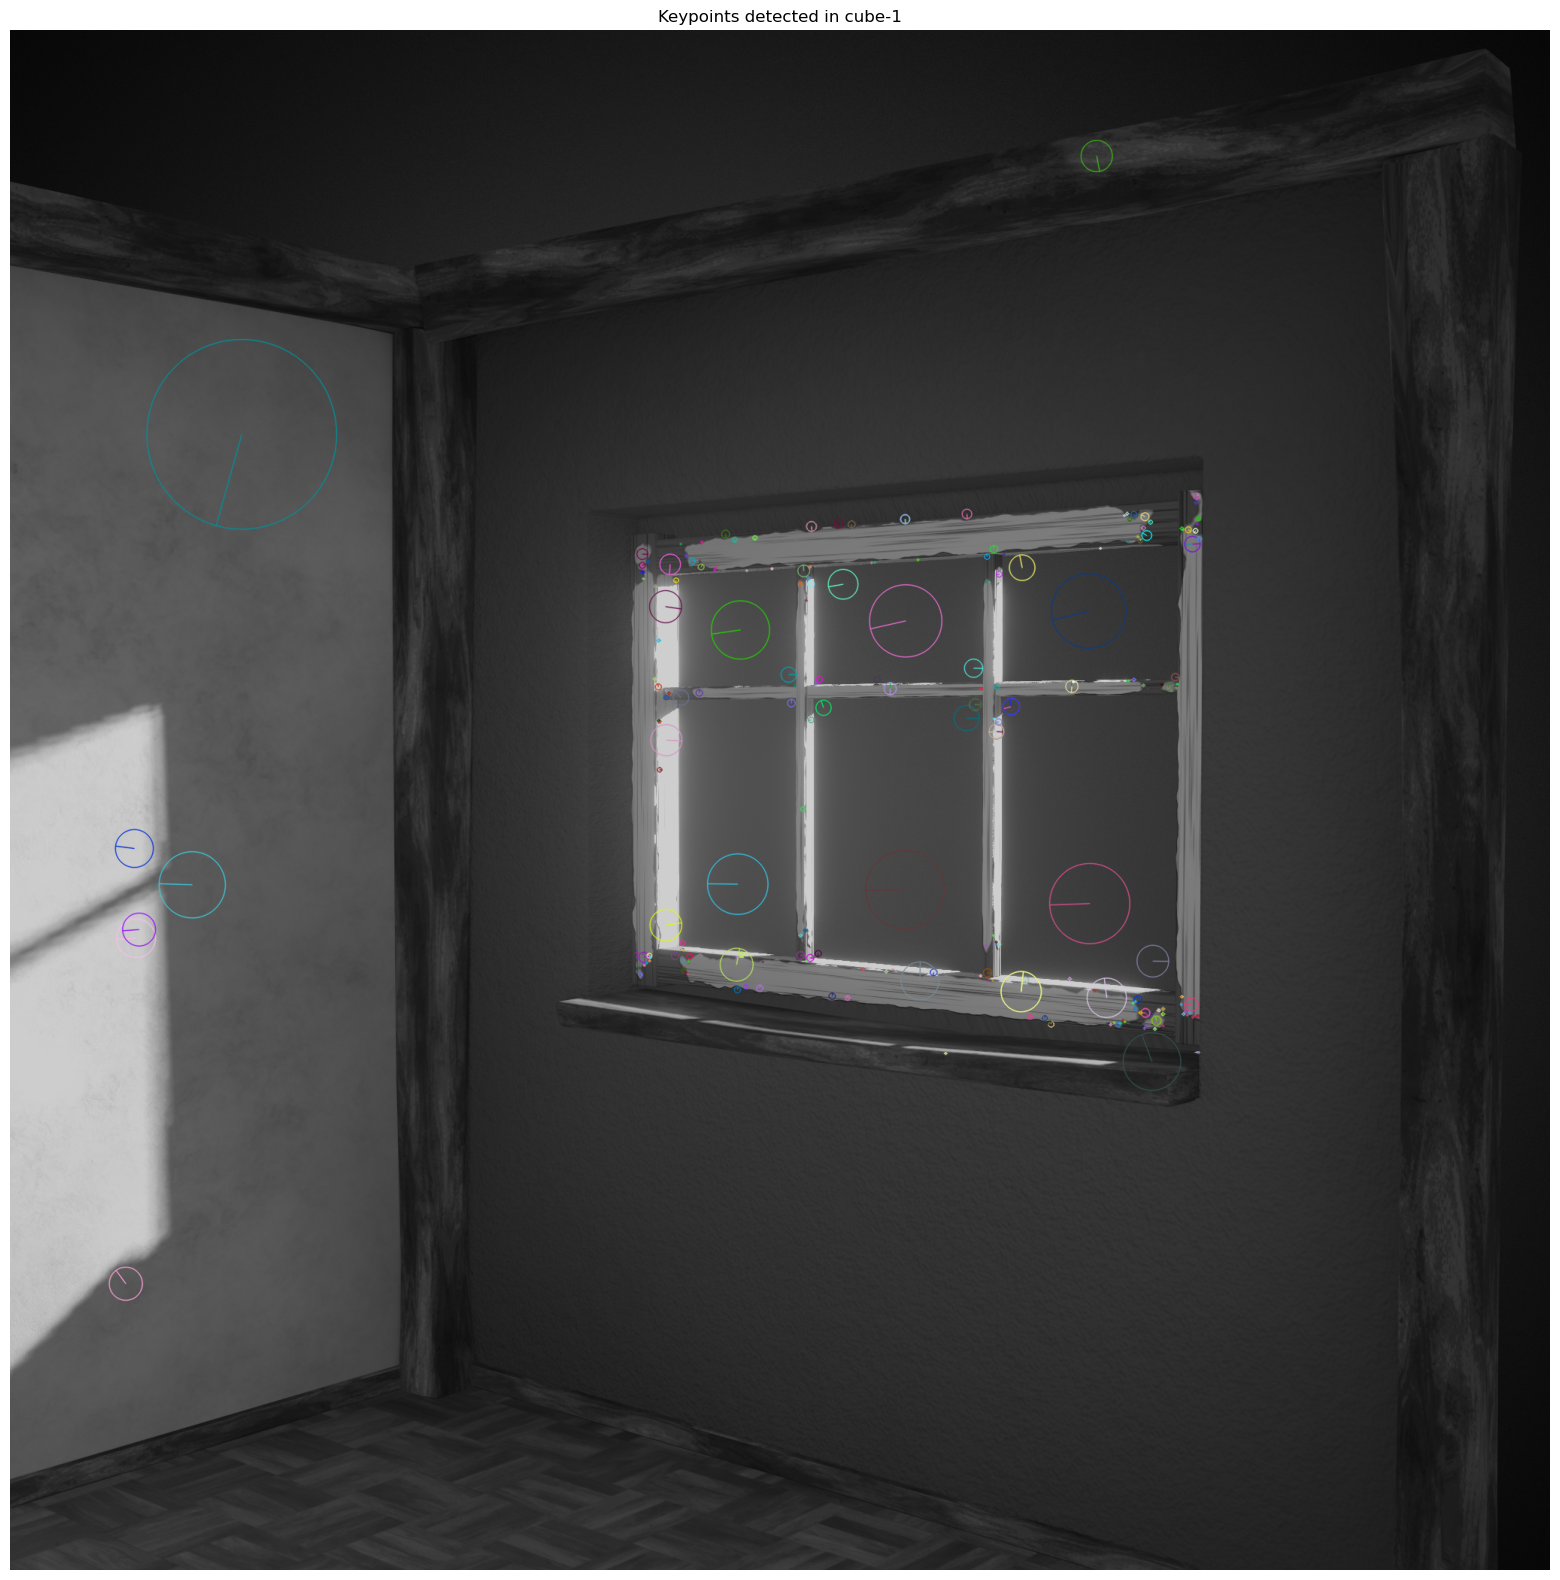

In [86]:
# show image 1 with keypoints
kp_img1_draw = cv.drawKeypoints(
    im1, kp_img1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.figure(figsize=(20, 20))
plt.imshow(kp_img1_draw)
plt.axis("off")
plt.title(f"Keypoints detected in {im_name1}")
# save figure
# plt.savefig(f"{img_folder}/cubes_sift_kp1.png", dpi=600)
plt.show()

# show image 2 with keypoints
kp_img2_draw = cv.drawKeypoints(
    im2, kp_img2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.figure(figsize=(20, 20))
plt.imshow(kp_img2_draw)
plt.axis("off")
plt.title(f"Keypoints detected in {im_name2}")
# save figure
# plt.savefig(f"{img_folder}/cubes_sift_kp2.png", dpi=600)
plt.show()

Show curvature values


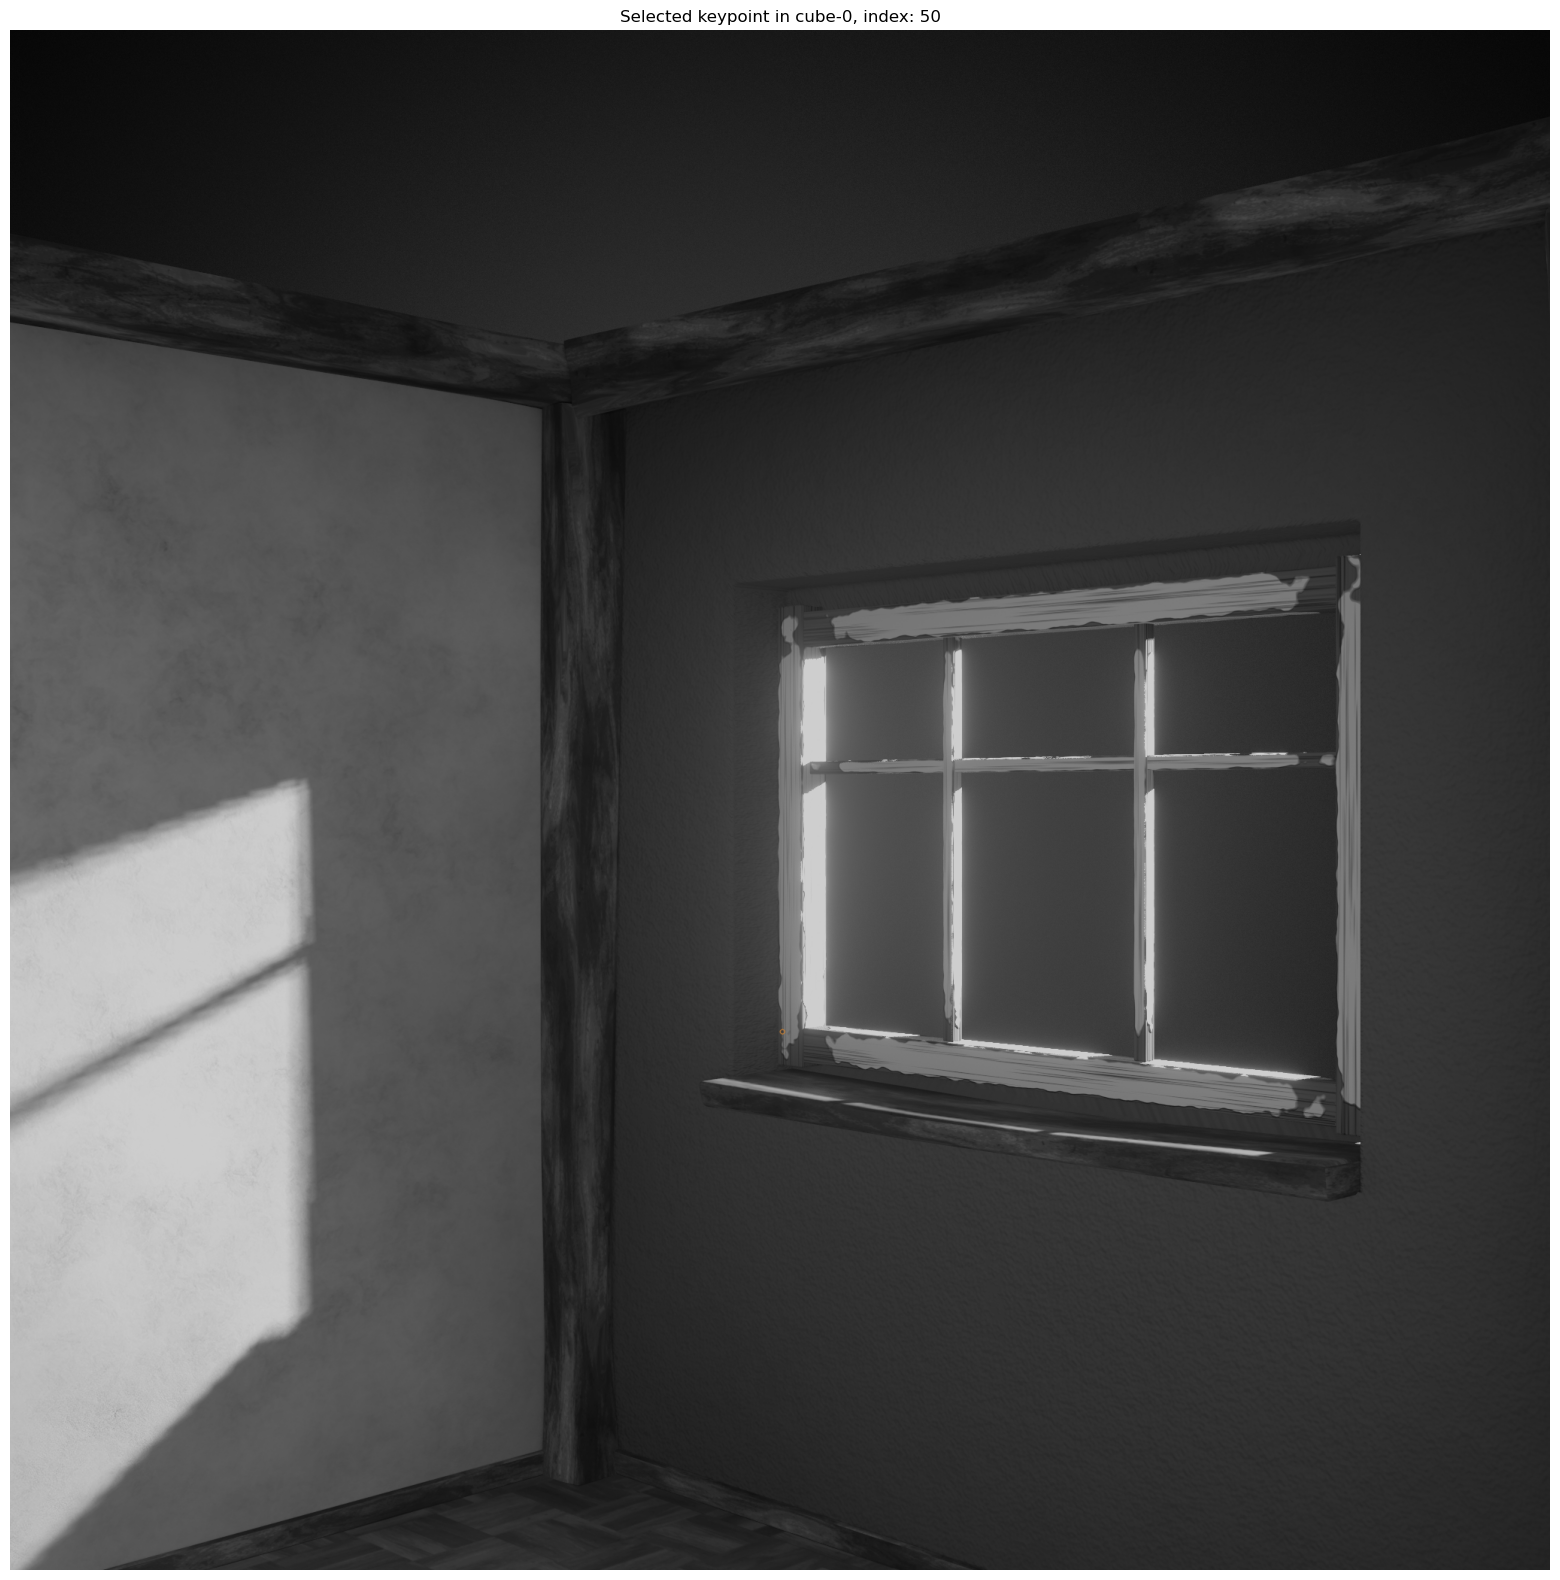

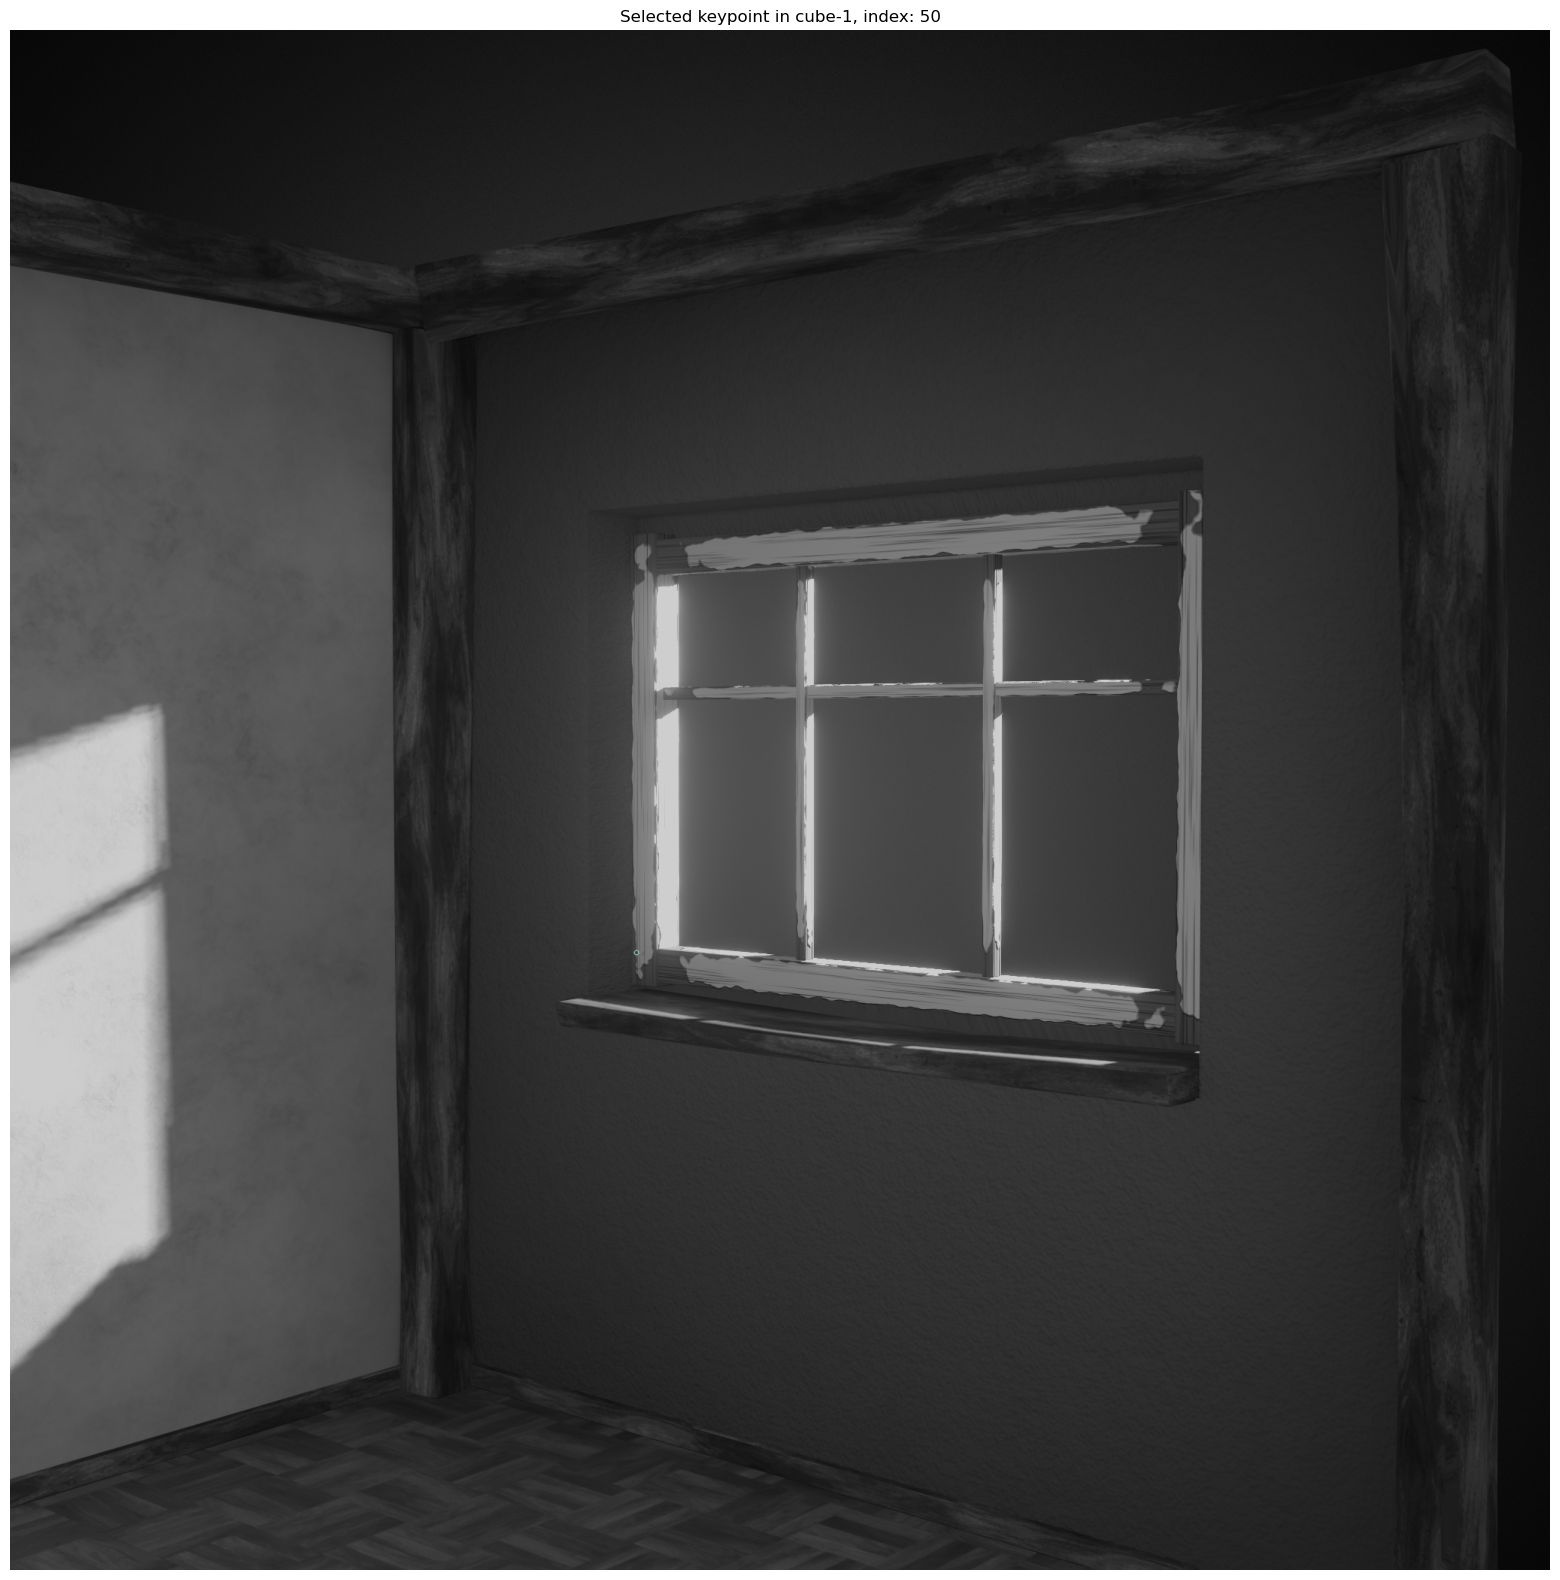

In [83]:
zoom_radius = 30
kp_index = 50
kp1 = kp_img1[kp_index]
kp2 = kp_img2[kp_index]

# draw single keypoint on image 0
kp_img1_draw_single = cv.drawKeypoints(im1, [kp1], None, flags=None)
plt.figure(figsize=(20, 20))
plt.imshow(kp_img1_draw_single)
plt.axis("off")
plt.title(f"Selected keypoint in {im_name1}, index: {kp_index}")
# save figure
plt.show()

# draw single keypoint on image 1
kp_img2_draw_single = cv.drawKeypoints(im2, [kp2], None, flags=None)
plt.figure(figsize=(20, 20))
plt.imshow(kp_img2_draw_single)
plt.axis("off")
plt.title(f"Selected keypoint in {im_name2}, index: {kp_index}")
# save figure
plt.show()

1026.8193359375 1331.6727294921875


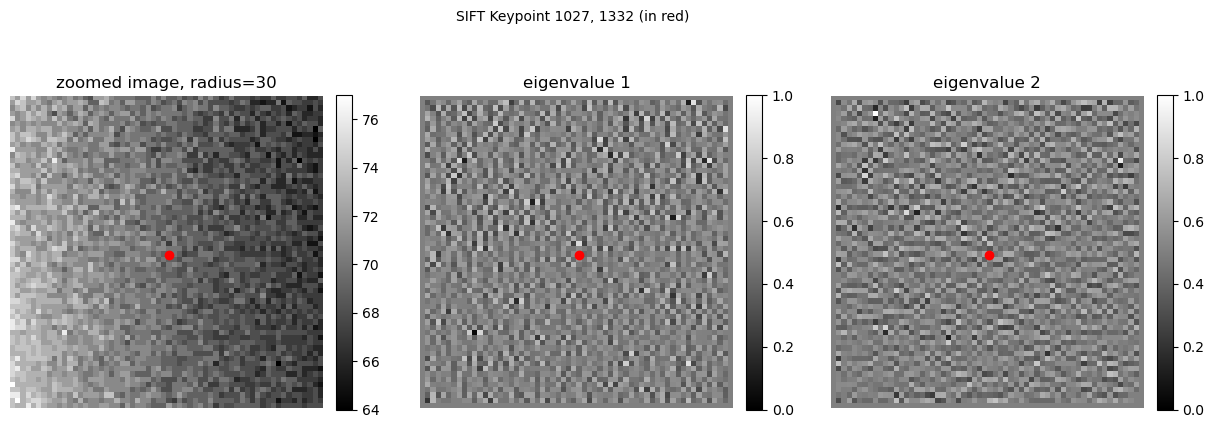

832.7858276367188 1226.413818359375


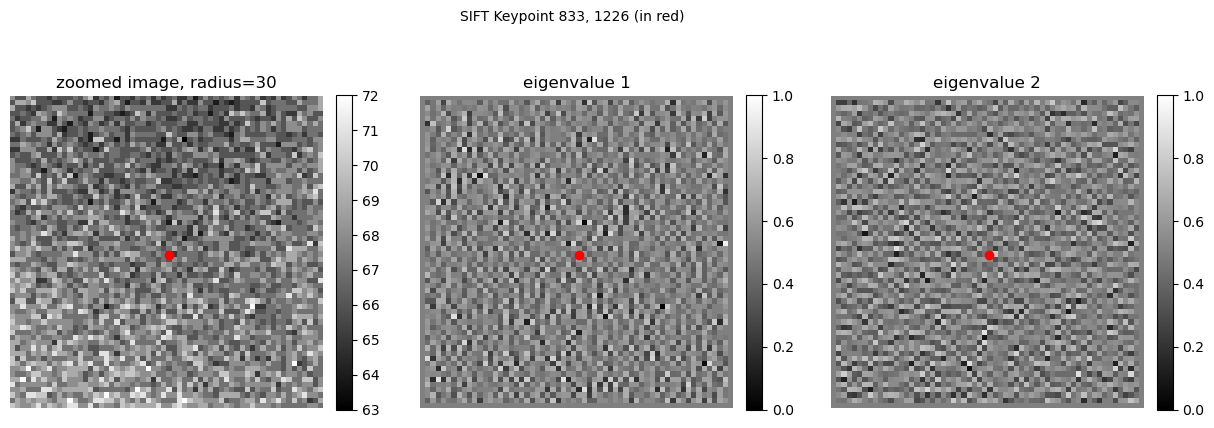

In [84]:
# display the figure of curvature values
eigval_fig1 = visualize_curvature_values(im1, kp1, zoom_radius)
plt.figure(eigval_fig1.number)
plt.show()

eigval_fig2 = visualize_curvature_values(im2, kp2, zoom_radius)
plt.figure(eigval_fig2.number)
plt.show()

Show curvature directions


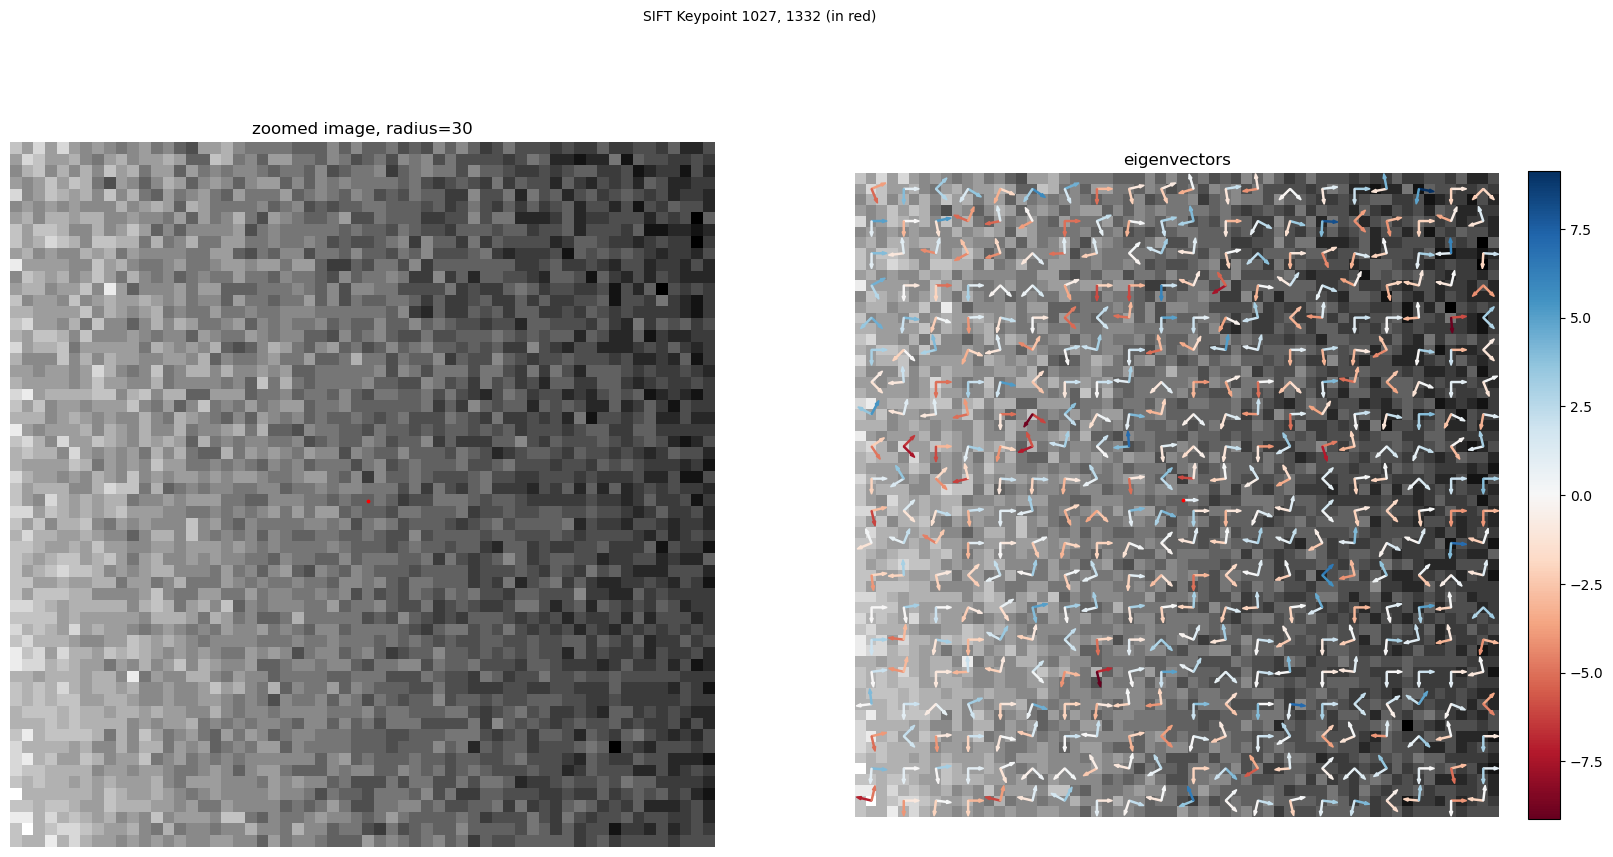

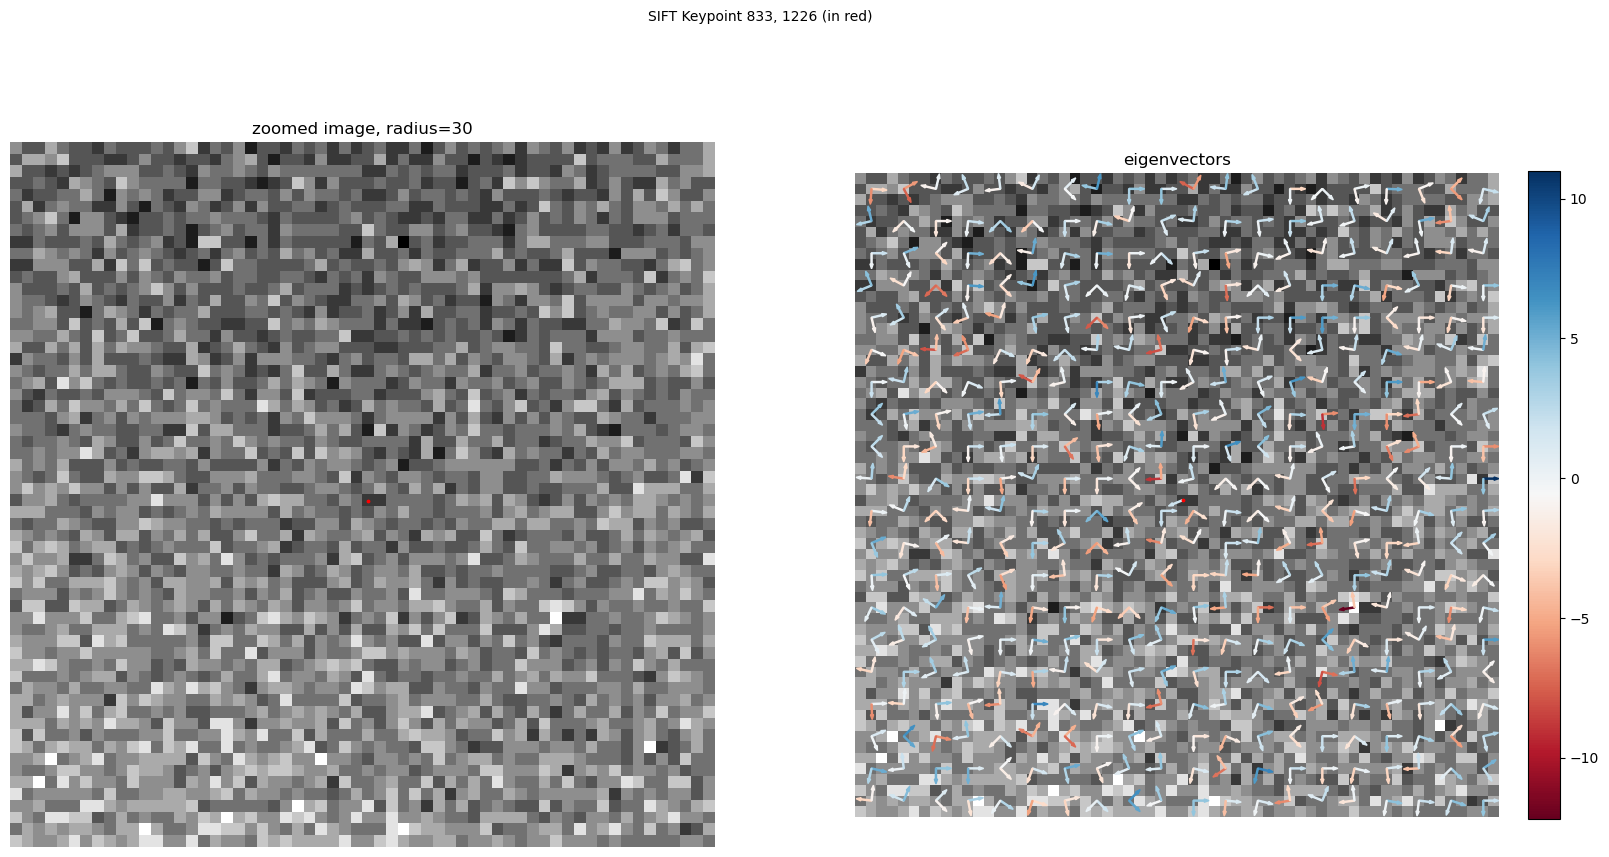

In [97]:
curvdir_fig1 = visualize_curvature_directions(im1, kp1, zoom_radius)
curvdir_fig1.set_size_inches(20, 10)
plt.figure(curvdir_fig1.number)
plt.show()

curvdir_fig2 = visualize_curvature_directions(im2, kp2, zoom_radius)
curvdir_fig2.set_size_inches(20, 10)
plt.figure(curvdir_fig2.number)
plt.show()

Show gradients


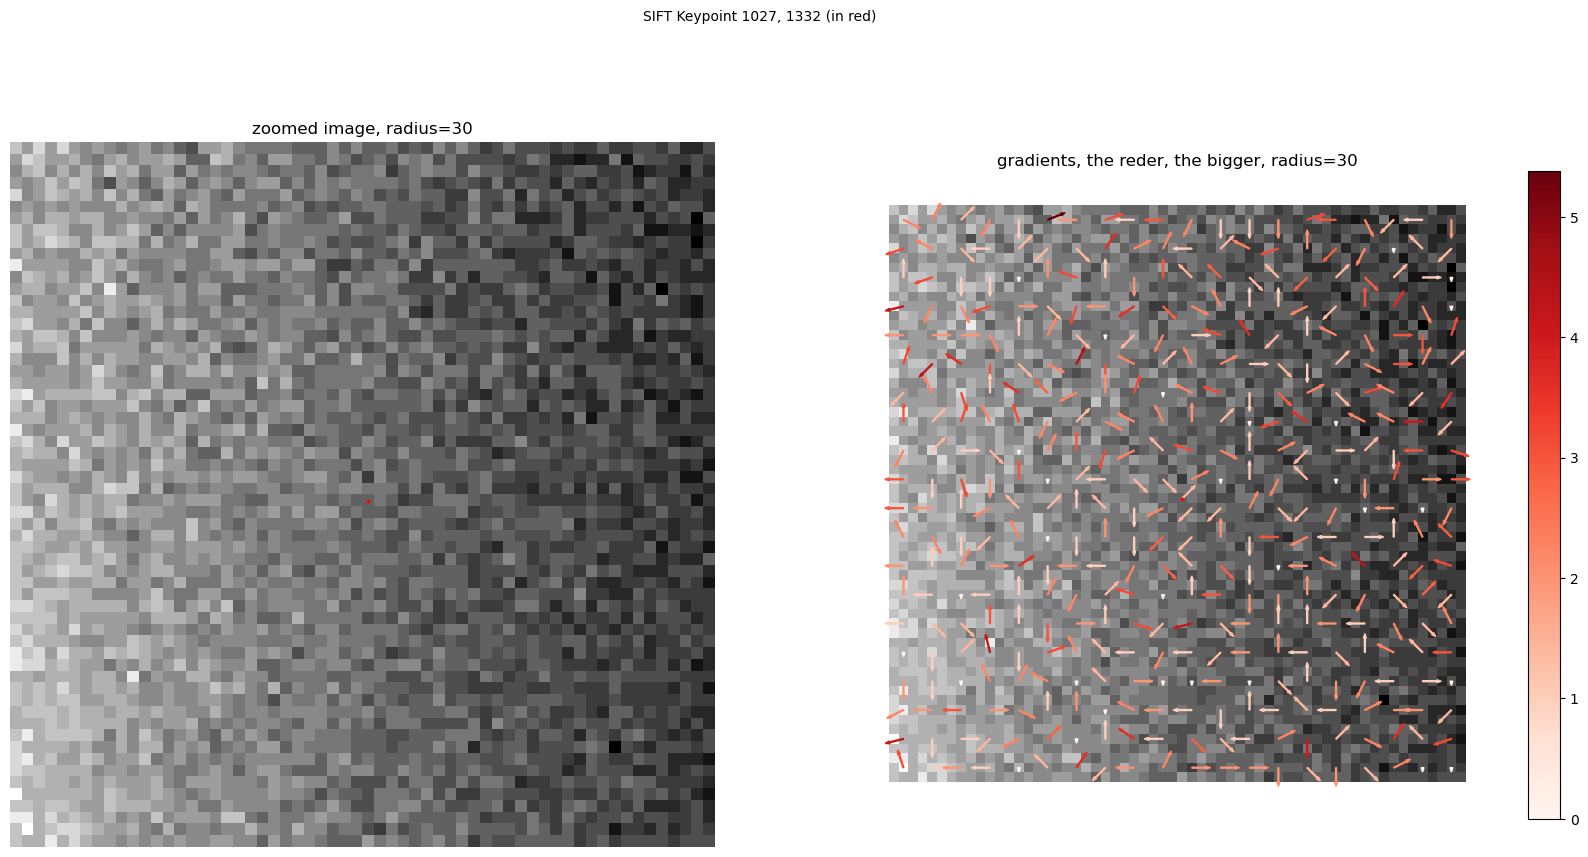

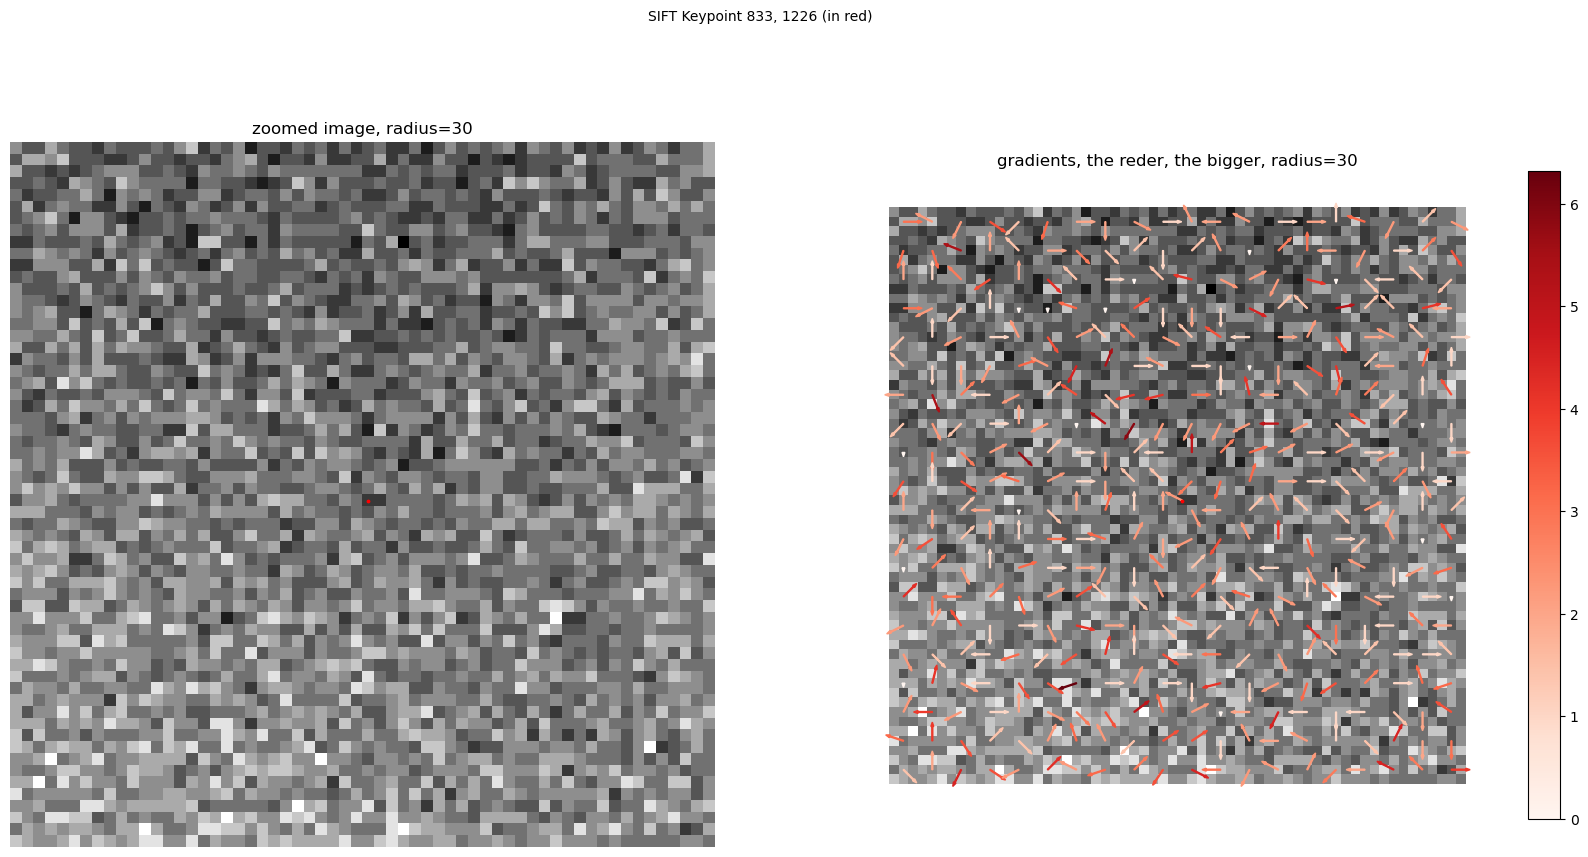

In [98]:
grad_fig1 = visualize_gradients(im1, kp1, zoom_radius)
grad_fig1.set_size_inches(20, 10)
plt.figure(grad_fig1.number)
plt.show()

grad_fig2 = visualize_gradients(im2, kp2, zoom_radius)
grad_fig2.set_size_inches(20, 10)
plt.figure(grad_fig2.number)
plt.show()